In [1]:
import numpy as np
import PIL.Image as Im
import matplotlib.pyplot as plt
import math
import scipy as sp
import scipy.signal

In [2]:
import matlab.engine
eng = matlab.engine.start_matlab()

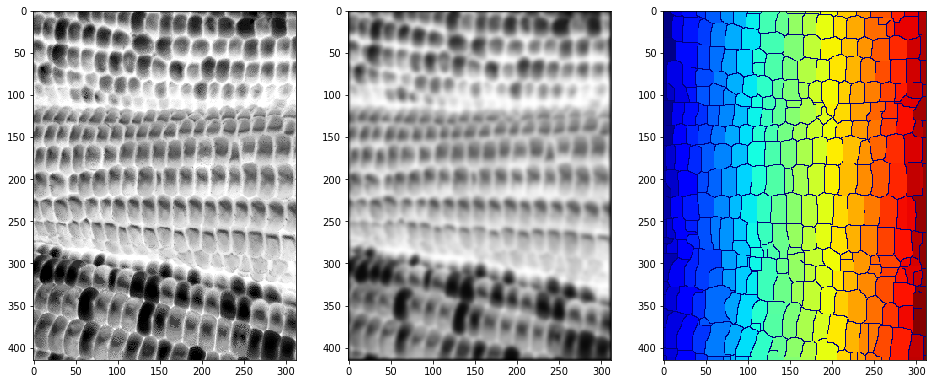

In [3]:
corn = Im.open('corn.tif')
corn_g = corn.convert("L")
corn_gi = 255 - np.array(corn_g)

plt.figure(figsize=(16,8))
plt.subplot(131)
plt.imshow(corn_gi, cmap='gray')

kernel = np.array(((1, 2, 1), (2, 4, 2), (1, 2, 1))) / 16
d = corn_gi
k = 9
for i in range(k):
    d = sp.signal.convolve2d(d, kernel, 'same')

plt.subplot(132)
plt.imshow(d, cmap='gray')

w = eng.watershed(matlab.double(d.tolist()))
plt.subplot(133)
plt.imshow(w, cmap='jet')

## Question 1
Because in watershed light pixels represnt high elevations

## Question 2
Because it's a high frequency image, a lot of changes in "elevation"

## Question 3
Around 9 times

{'Connectivity': 8.0, 'ImageSize': matlab.double([[415.0,312.0]]), 'NumObjects': 337.0, 'PixelIdxList': [1.0, 21.0, 43.0, 71.0, 93.0, 129.0, 148.0, 178.0, 200.0, 207.0, 229.0, 254.0, 276.0, 285.0, 305.0, 328.0, 345.0, 368.0, 386.0, 408.0, 415.0, 2584.0, 2690.0, 2744.0, 3077.0, 3320.0, 3659.0, 4143.0, 4524.0, 4852.0, 5052.0, 6641.0, 6660.0, 6768.0, 6953.0, 7283.0, 7618.0, 7724.0, 8887.0, 10575.0, 10665.0, 10717.0, 10790.0, 11169.0, 11668.0, 12111.0, 12164.0, 12451.0, 13302.0, 13375.0, 13509.0, 13535.0, 13592.0, 13842.0, 13966.0, 15529.0, 17360.0, 17845.0, 18389.0, 18643.0, 18676.0, 18990.0, 19113.0, 19141.0, 20069.0, 20121.0, 20414.0, 20561.0, 20588.0, 20707.0, 20852.0, 21751.0, 24486.0, 24615.0, 24804.0, 25099.0, 25315.0, 25665.0, 25782.0, 26247.0, 26294.0, 26396.0, 26532.0, 27415.0, 27887.0, 28391.0, 28863.0, 29596.0, 31125.0, 31126.0, 31644.0, 31795.0, 32153.0, 32275.0, 32669.0, 32843.0, 33134.0, 33350.0, 33592.0, 34475.0, 35361.0, 35690.0, 36106.0, 36333.0, 37066.0, 37106.0, 37628.0

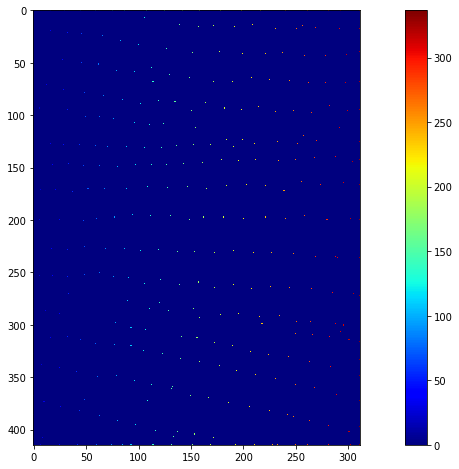

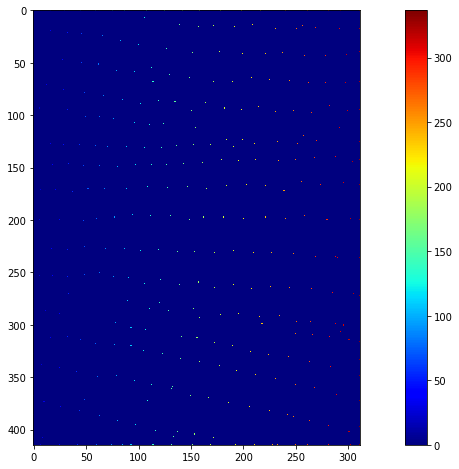

In [4]:
d_min = eng.imregionalmin(matlab.double(d.tolist()))
cc = eng.bwconncomp(d_min, float(8))
im_label = eng.labelmatrix(cc)
plt.figure(figsize=(16,8))
plt.imshow(im_label, cmap='jet')
plt.colorbar()

plt.figure(figsize=(16,8))
plt.imshow(im_label, cmap='jet')
plt.colorbar()

print(cc)

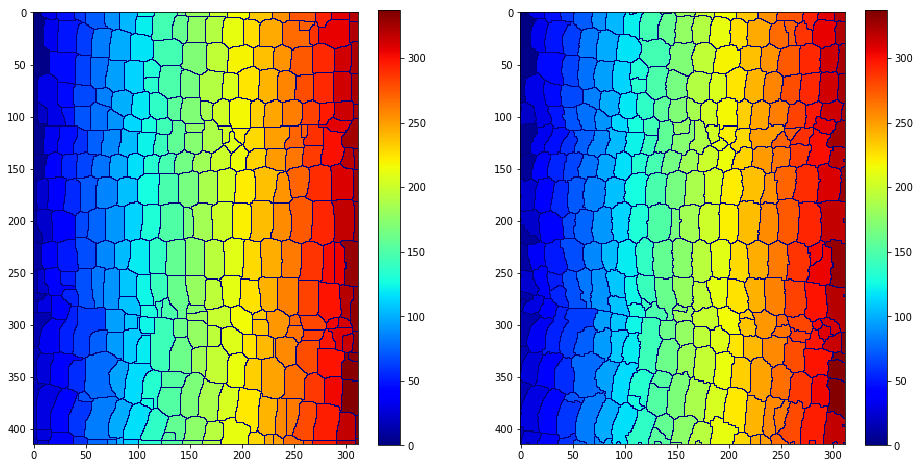

In [5]:
w1 = eng.watershed_meyer(matlab.double(d.tolist()), eng.images.internal.getBinaryConnectivityMatrix(float(8)), cc)
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(w1, cmap='jet')
plt.colorbar()

w2 = eng.watershed_meyer(matlab.double(corn_gi.tolist()), eng.images.internal.getBinaryConnectivityMatrix(float(8)), cc)
plt.subplot(122)
plt.imshow(w2, cmap='jet')
plt.colorbar()

## Question 4
The im2gray is more jagged, this might be closer to an actual segmentation.

NameError: name 'im2g' is not defined

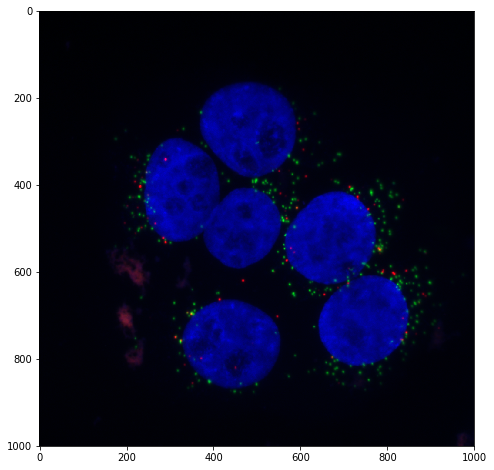

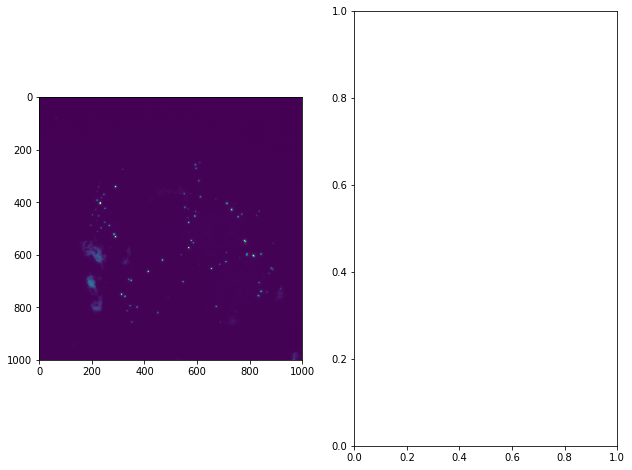

In [14]:
im1 = np.array(Im.open('lab5files/C9minpeps2.bmp'))
plt.figure(figsize=(8,8))
plt.imshow(im1)

im1r = im1[:, :, 0]
im1g = im1[:, :, 1]
im1b = im1[:, :, 2]

im1b_small = im1[200:800, 200:800, 2]
plt.figure(figsize=(16,8))
plt.subplot(131)
plt.imshow(im1r)

plt.subplot(132)
plt.imshow(im1g)

plt.subplot(133)
plt.imshow(im2b)

